# Multi-Level Line, Encoding and Decoding Python Impelementation

In this practical, at first we saw the graph of input set, then observe both encoded and decoded graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install numpy

In [3]:
# !pip install matplotlib

- numpy is useful for handling data structures and mathematical functions.

- matplotlib.pyplot is used for creating visual plots and graphs to represent data.

- for installing numpy and matplotlib, we can just run the commented 2 line code without commenting

In [4]:
input_binary_string = '10110010'
#  input_binary_string = input("Enter a binary string (e.g., 10110010): ")

Here I just took the input.

In [5]:
input_binary_array_list = [int(char) for char in input_binary_string]
print(input_binary_array_list)

[1, 0, 1, 1, 0, 0, 1, 0]


At first, I compress the string to a list of integers and then normally print the output list.

In [6]:
def graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',color='red')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title('Input GRAPH')
    # plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

This code mainly generate the graph, now I will just call the function referencing the input signal.

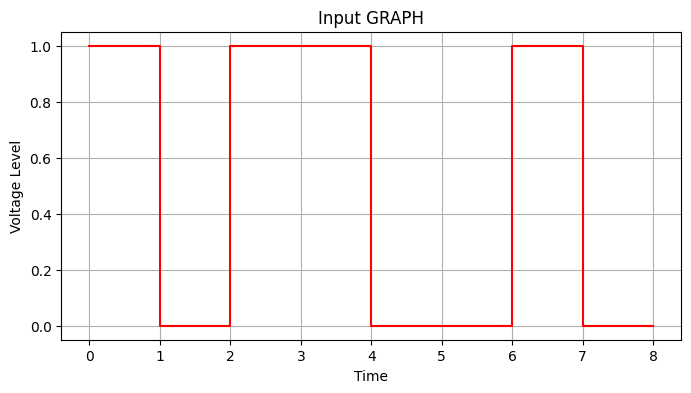

In [7]:
graph_design(input_binary_array_list)

And this complete the graph of input set.

# Introduction to Multi-Level Line Encoding and Decoding Scheme

• Multi-level encoding uses more than two voltage levels to encode binary data.
• This helps reduce the frequency spectrum and makes signals more bandwidth-efficient.
• Common examples: MLT-3, 2B1Q, 4B3T, etc.


### MLT-3 Encoding (Multi-Level Transmit - 3 levels)

• Voltage levels: +1, 0, -1
• Rules:
o If the input bit is 0: no change in signal level.
o If the input bit is 1: transition to the next level in the sequence:
→ 0 → +1 → 0 → -1 → 0 → +1 and so on.

This pattern repeats cyclically:
... → 0 → +1 → 0 → -1 → 0 → +1 → ...

### MLT-3 Encoding Algorithm

Input: Binary string (e.g., "1100101")
Output: Voltage level sequence
1. Set initial level to 0.
2. Define the transition sequence: [0, +1, 0, -1].
3. Initialize an index to track the current position in the transition cycle.
4. For each bit:
o If bit is '0': repeat last level.
o If bit is '1': move to the next level in the transition sequence.

In [8]:
def mlt_encode(bits):
    pattern = [0,1,0,-1]
    prev = 0
    curr = 0
    signal = []
    for i in bits:
        if i == '1':
            prev = (prev + 1) % 4
            curr = pattern[prev]
        signal.append(curr)
    return signal

In [9]:
mlt_encoded_signal = mlt_encode(input_binary_string)

In [10]:
print(f"Multi Level Line Encoded Signal : {mlt_encoded_signal}")

Multi Level Line Encoded Signal : [1, 1, 0, -1, -1, -1, 0, 0]


In [11]:
def ML3_encoded_graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',color='purple')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title(f"Multi Level Encoding for: {input_binary_string}")
    plt.yticks([-1, 0, 1])
    plt.grid(True)
    plt.show()   

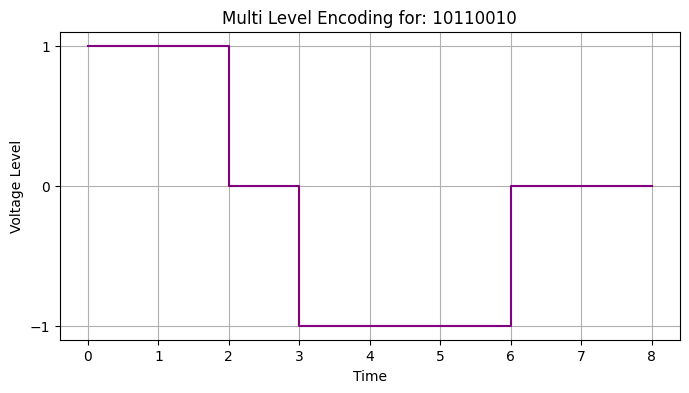

In [12]:
ML3_encoded_graph_design(mlt_encoded_signal)

### Decoding
Input: Encoded signal (list of voltage levels)
Output: Binary string
1. Compare each signal level with the previous one.
- If it changes: append '1'
- If it remains the same: append '0'

In [13]:
def mlt_decode(mlt_encoded_signal):
    decoded_signal = ''
    for i in range(len(mlt_encoded_signal)):
        if i == 0:
            if mlt_encoded_signal != 0:
                decoded_signal+='1'
            else:
                decoded_signal+='0'
        elif mlt_encoded_signal[i] != mlt_encoded_signal[i-1]:
            decoded_signal +='1'
        else:
            decoded_signal+='0'
    return decoded_signal

In [14]:
mlt_decoded_signal = mlt_decode(mlt_encoded_signal)

In [15]:
print(f"Multi Decoded Signal : {mlt_decoded_signal}")

Multi Decoded Signal : 10110010


In [16]:
decode_list = [int(char) for char in mlt_decoded_signal]
print(decode_list)

[1, 0, 1, 1, 0, 0, 1, 0]


In [17]:
def ML3_decoded_graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',color='purple')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title(f"Multi Level Decoding for: {mlt_decoded_signal}")
    plt.yticks([-1, 0, 1])
    plt.grid(True)
    plt.show()   

In [18]:
ML3_decoded_graph_design(decode_list_negative)

NameError: name 'decode_list_negative' is not defined